## Download the data

In [3]:
from src.m4_loader import download_m4_tarball, extract_m4_rda_from_tarball

tar_path = download_m4_tarball()
rda_path = extract_m4_rda_from_tarball(tar_path)
print(rda_path)  # should be .../data/M4.rda


Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


  https://github.com/carlanetto/M4comp2018/releases/download/0.2.0/M4comp2018_0.2.0.tar.gz
Saved to: C:\Users\monta\Documents\Phd\2025\M4comp2018py\data\M4comp2018_0.2.0.tar.gz
Extracting M4.* from tarball: C:\Users\monta\Documents\Phd\2025\M4comp2018py\data\M4comp2018_0.2.0.tar.gz
Extracted M4comp2018/data/M4.rda -> C:\Users\monta\Documents\Phd\2025\M4comp2018py\data\M4.rda
C:\Users\monta\Documents\Phd\2025\M4comp2018py\data\M4.rda


## Print one Series

In [4]:
from src.m4_loader import (
    download_m4_tarball,
    extract_m4_rda_from_tarball,
    load_m4_r_object,
    get_m4_series_py,print_m4_variables, extract_m4_series,filter_m4_series,
)

# Step 1–2 (only needed once)
download_m4_tarball()
extract_m4_rda_from_tarball()

# Step 3: load M4 object
m4 = load_m4_r_object()  # uses data/M4.rda by default

# Get the same series as your R example: M4[[40773]]
s40773 = get_m4_series_py(m4, 40773)

print(s40773.keys())
print("n:", s40773["n"], "h:", s40773["h"], "period:", s40773["period"])


Tarball already exists at: C:\Users\monta\Documents\Phd\2025\M4comp2018py\data\M4comp2018_0.2.0.tar.gz
M4.rda already exists at: C:\Users\monta\Documents\Phd\2025\M4comp2018py\data\M4.rda
Loading M4 from: C:\Users\monta\Documents\Phd\2025\M4comp2018py\data\M4.rda
Retrieved M4 object from R. Total series: 100000
dict_keys(['st', 'n', 'h', 'period', 'type', 'x', 'xx'])
n: 57 h: 8 period: 4


## Plot one series

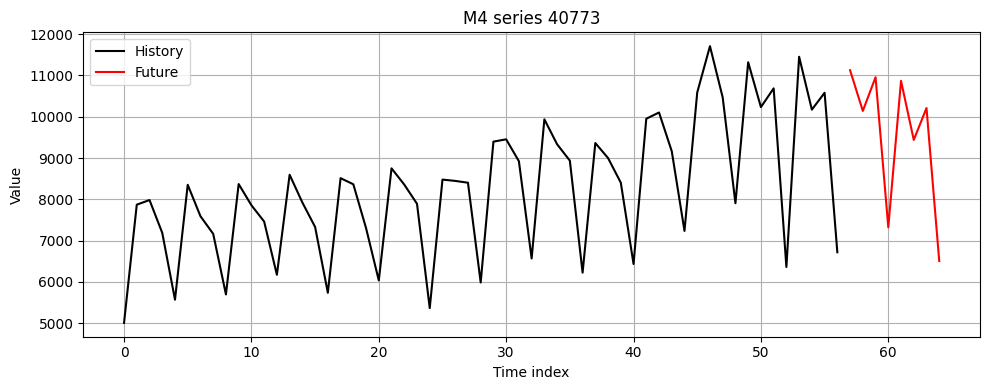

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = s40773["x"]   # historical values
xx = s40773["xx"] # future values

full = np.concatenate([x, xx])
t_full = np.arange(len(full))
t_hist = np.arange(len(x))

plt.figure(figsize=(10, 4))

# History in black
plt.plot(t_hist, x, color="black", label="History")

# Future in red
plt.plot(np.arange(len(x), len(full)), xx, color="red", label="Future")

plt.title("M4 series 40773")
plt.xlabel("Time index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Single time series

In [6]:
print_m4_variables(m4, 40773)


Variables for M4[[40773]]:
 - st
 - x
 - n
 - type
 - h
 - period
 - xx
 - pt_ff
 - up_ff
 - low_ff


## Single series

In [7]:
# Extract series 40773
series = extract_m4_series(m4, 40773)

series

{'st': 'Q17773',
 'x': array([ 5006.1249,  7870.056 ,  7982.6444,  7187.2104,  5568.5631,
         8351.7057,  7590.2907,  7163.4121,  5695.4959,  8369.8116,
         7856.5262,  7460.8898,  6171.5568,  8594.747 ,  7923.2059,
         7330.6663,  5735.902 ,  8512.6873,  8365.0007,  7302.5535,
         6035.0404,  8750.1923,  8356.8021,  7891.8827,  5364.5957,
         8477.8541,  8446.2784,  8402.2588,  5984.8426,  9397.6832,
         9453.6412,  8922.7765,  6566.2979,  9937.7364,  9333.3198,
         8936.7209,  6223.1677,  9363.4869,  8999.533 ,  8403.1844,
         6433.0142,  9951.8391, 10103.7035,  9165.359 ,  7233.9411,
        10588.1624, 11710.6061, 10467.2905,  7904.6742, 11321.6254,
        10233.8537, 10688.26  ,  6360.58  , 11453.83  , 10172.6   ,
        10581.27  ,  6716.96  ]),
 'n': 57,
 'type': '3',
 'h': 8,
 'period': '4',
 'xx': array([11128.19, 10141.08, 10958.36,  7322.36, 10870.54,  9438.82,
        10212.18,  6504.2 ]),
 'pt_ff': array([[10883.4       , 10434.81 

## All series (no filters)

In [9]:
m4 = load_m4_r_object()   # you already have this working

all_series = filter_m4_series(m4)
len(all_series)  # should be ~100000


Loading M4 from: C:\Users\monta\Documents\Phd\2025\M4comp2018py\data\M4.rda


KeyboardInterrupt: 

# Only financial, quarterly

In [10]:
yearly_M4 = filter_m4_series(
    m4,
    period="Yearly" #,
   # type="Finance"
)

print(len(yearly_M4))


Selected 23000 series out of 100000 (period=Yearly, type=None)
23000


## Test with a small number of series

In [11]:
sample_financial_quarterly = filter_m4_series(
    m4,
    period="Quarterly",
    type="Finance",
    max_series=5
)

for idx, series in sample_financial_quarterly.items():
    print(idx, series["st"], series["period"], series["type"])


Selected 5 series out of 100000 (period=Quarterly, type=Finance)
40831 Q17831 4 2
40832 Q17832 4 2
40833 Q17833 4 2
40834 Q17834 4 2
40835 Q17835 4 2
